Power METHOD

$z^{(k)} = Aq^{(k−1)}$ \\


$q^{(k)} =\frac{z^{(k)}}{||z^{(k)}||}$ \\


$μ(q^{(k)}) = [q^{(k)}]^{T}Aq^{(k)}$

In [ ]:
import numpy as np
def mag(xs):
 return np.sqrt(np.sum(xs*xs))
def power(A,kmax=6):
 zs = np.ones(A.shape[0])
 qs = zs/mag(zs)
 for k in range(1,kmax):
  zs = A@qs
  qs = zs/mag(zs)
  print(k,qs)
 lam = qs@A@qs
 return lam, qs
def testeigone(f,A,indx=0):
 eigval, eigvec = f(A)
 print(" "); print(eigval); print(eigvec)
 npeigvals, npeigvecs = np.linalg.eig(A)
 print(" ")
 print(npeigvals[indx]); print(npeigvecs[:,indx])
def testcreate(n,val):
  A = np.arange(val,val+n*n).reshape(n,n)
  A = np.sqrt(A)
  bs = (A[0,:])**2.1
  if (np.linalg.det(A)):
    print("Non Singular matrix")
  else:
    print("Singular Matrix")
  return A, bs
A, bs = testcreate(4,21)
testeigone(power,A)

Non Singular matrix
1 [0.44421209 0.48212489 0.51726163 0.55015599]
2 [0.4443962  0.4821814  0.5172089  0.55000734]
3 [0.44439562 0.48218122 0.51720907 0.55000781]
4 [0.44439562 0.48218122 0.51720906 0.55000781]
5 [0.44439562 0.48218122 0.51720906 0.55000781]
 
21.316662663452
[0.44439562 0.48218122 0.51720906 0.55000781]
 
21.316662663452043
[0.44439562 0.48218122 0.51720906 0.55000781]


INVERSE POWER

In [ ]:
import numpy as np
def termcrit(xolds,xnews):
  errs = np.abs((xnews - xolds)/xnews)
  return np.sum(errs)
def forsub(L,bs):
  n = bs.size
  xs = np.zeros(n)
  for i in range(n):
    xs[i] = (bs[i] - L[i,:i]@xs[:i])/L[i,i]
  return xs
def backsub(U,bs):
  n = bs.size
  xs = np.zeros(n)
  for i in reversed(range(n)):
    xs[i] = (bs[i] - U[i,i+1:]@xs[i+1:])/U[i,i]
  return xs
def ludec(A):
  n = A.shape[0]
  U = np.copy(A)
  L = np.identity(n)
  for j in range(n-1):
    for i in range(j+1,n):
      coeff = U[i,j]/U[j,j]
      U[i,j:] -= coeff*U[j,j:]
      L[i,j] = coeff
  return L, U
def mag(xs):
 return np.sqrt(np.sum(xs*xs))
def testeigone(f,A,indx=3):
 eigval, eigvec = f(A)
 print(" "); print(eigval); print(eigvec)
 npeigvals, npeigvecs = np.linalg.eig(A)
 print(" ")
 print(npeigvals[indx]); print(npeigvecs[:,indx])
def testcreate(n,val):
  A = np.arange(val,val+n*n).reshape(n,n)
  A = np.sqrt(A)
  bs = (A[0,:])**2.1
  return A, bs
def invpowershift(A,shift=0,kmax=200,tol=1.e-8):
  n = A.shape[0]
  znews = np.ones(n)
  qnews = znews/mag(znews)
  Astar = A
  L, U = ludec(Astar)
  for k in range(1,kmax):
    qs = np.copy(qnews)
    ys = forsub(L,qs)
    znews = backsub(U,ys)
    qnews = znews/mag(znews)
    if qs@qnews<0:
      qnews = -qnews
    err = termcrit(qs, qnews)
    print(k, qnews, err)
    if err < tol:
      lam = qnews@A@qnews
      break
  else:
    lam = qnews = None
  return lam, qnews
A, bs = testcreate(4,21)
testeigone(invpowershift,A)

1 [-0.19413979  0.63927381 -0.69930436  0.25418919] 6.475361348514734
2 [-0.20535582  0.65200499 -0.68860547  0.24195243] 0.1402558669886967
3 [-0.20536844  0.6520184  -0.6885935   0.24193967] 0.00015213395518359692
4 [-0.20536846  0.65201842 -0.68859348  0.24193965] 1.646703298787922e-07
5 [-0.20536846  0.65201842 -0.68859348  0.24193965] 1.7824102693162985e-10
 
-7.501283413473064e-08
[-0.20536846  0.65201842 -0.68859348  0.24193965]
 
-7.501283389068605e-08
[ 0.20536846 -0.65201842  0.68859348 -0.24193965]


INVERSE POWER WITH SHIFT

In [1]:
import numpy as np
def termcrit(xolds,xnews):
  errs = np.abs((xnews - xolds)/xnews)
  return np.sum(errs)
def forsub(L,bs):
  n = bs.size
  xs = np.zeros(n)
  for i in range(n):
    xs[i] = (bs[i] - L[i,:i]@xs[:i])/L[i,i]
  return xs
def backsub(U,bs):
  n = bs.size
  xs = np.zeros(n)
  for i in reversed(range(n)):
    xs[i] = (bs[i] - U[i,i+1:]@xs[i+1:])/U[i,i]
  return xs
def ludec(A):
  n = A.shape[0]
  U = np.copy(A)
  L = np.identity(n)
  for j in range(n-1):
    for i in range(j+1,n):
      coeff = U[i,j]/U[j,j]
      U[i,j:] -= coeff*U[j,j:]
      L[i,j] = coeff
  return L, U
def mag(xs):
 return np.sqrt(np.sum(xs*xs))
def testeigone(f,A,indx=0):
 eigval, eigvec = f(A)
 print(" "); print(eigval); print(eigvec)
 npeigvals, npeigvecs = np.linalg.eig(A)
 print(" ")
 print(npeigvals[indx]); print(npeigvecs[:,indx])
def testcreate(n,val):
  A = np.arange(val,val+n*n).reshape(n,n)
  A = np.sqrt(A)
  bs = (A[0,:])**2.1
  return A, bs
def invpowershift(A,shift=20,kmax=200,tol=1.e-8):
  n = A.shape[0]
  znews = np.ones(n)
  qnews = znews/mag(znews)
  Astar = A - np.identity(n)*shift
  L, U = ludec(Astar)
  for k in range(1,kmax):
    qs = np.copy(qnews)
    ys = forsub(L,qs)
    znews = backsub(U,ys)
    qnews = znews/mag(znews)
    if qs@qnews<0:
      qnews = -qnews
    err = termcrit(qs, qnews)
    print(k, qnews, err)
    if err < tol:
      lam = qnews@A@qnews
      break
  else:
    lam = qnews = None
  return lam, qnews

A, bs = testcreate(4,21)
testeigone(invpowershift,A)

1 [0.44065813 0.48090955 0.51822387 0.55316403] 0.30563801879330116
2 [0.44464049 0.48226426 0.51714199 0.54980012] 0.019975893536692307
3 [0.44437955 0.48217577 0.51721346 0.55002143] 0.0013112849763798457
4 [0.44439667 0.48218158 0.51720878 0.55000691] 8.603442270281627e-05
5 [0.44439555 0.4821812  0.51720908 0.55000787] 5.64496399461636e-06
6 [0.44439562 0.48218122 0.51720906 0.5500078 ] 3.703814284020928e-07
7 [0.44439562 0.48218122 0.51720906 0.55000781] 2.430173570284188e-08
8 [0.44439562 0.48218122 0.51720906 0.55000781] 1.5945032439464706e-09
 
21.316662663486134
[0.44439562 0.48218122 0.51720906 0.55000781]
 
21.316662663452043
[0.44439562 0.48218122 0.51720906 0.55000781]


Use invpowershift to evaluate all eigenvalues and all eigenvectors for:



$\begin{bmatrix} 3 & 1 & 2   \\
1 & 4 & 3 \\
2 &3 & 1
\end{bmatrix}$

Take the shifts as: $-2, 4, 5$

**QR DECOMPOSITION**

In [2]:
#QR Decomposition
import numpy as np
def mag(xs):
 return np.sqrt(np.sum(xs*xs))
def testcreate(n,val):
  A = np.arange(val,val+n*n).reshape(n,n)
  A = np.sqrt(A)
  bs = (A[0,:])**2.1
  return A, bs
def qrdec(A):
  n = A.shape[0]
  Ap = np.copy(A)
  Q = np.zeros((n,n))
  R = np.zeros((n,n))
  for j in range(n):
    for i in range(j):
      R[i,j] = Q[:,i]@A[:,j]
      Ap[:,j] -= R[i,j]*Q[:,i]
    R[j,j] = mag(Ap[:,j])
    Q[:,j] = Ap[:,j]/R[j,j]
  return Q, R
def testqrdec(A):
  n = A.shape[0]
  Q, R = qrdec(A)
  diffa = A - Q@R
  diffq = np.transpose(Q)@Q - np.identity(n)
  print(n, mag(diffa), mag(diffq))

for n in range(4,10,2):
    A, bs = testcreate(n,21)
    testqrdec(A)

4 8.881784197001252e-16 0.007574779382486467
6 2.6645352591003757e-15 2.448182686363376
8 5.617333549722722e-15 4.323370968322845


  QR METHOD

In [3]:
import numpy as np
def mag(xs):
 return np.sqrt(np.sum(xs*xs))
def testcreate(n,val):
  A = np.arange(val,val+n*n).reshape(n,n)
  A = np.sqrt(A)
  bs = (A[0,:])**2.1
  return A, bs
def qrdec(A):
  n = A.shape[0]
  Ap = np.copy(A)
  Q = np.zeros((n,n))
  R = np.zeros((n,n))
  for j in range(n):
    for i in range(j):
      R[i,j] = Q[:,i]@A[:,j]
      Ap[:,j] -= R[i,j]*Q[:,i]
    R[j,j] = mag(Ap[:,j])
    Q[:,j] = Ap[:,j]/R[j,j]
  return Q, R
def testqrdec(A):
  n = A.shape[0]
  Q, R = qrdec(A)
  diffa = A - Q@R
  diffq = np.transpose(Q)@Q - np.identity(n)
  print(n, mag(diffa), mag(diffq))

for n in range(4,10,2):
    A, bs = testcreate(n,21)
    testqrdec(A)
def qrmet(inA,kmax=100):
  A = np.copy(inA)
  for k in range(1,kmax):
    Q, R = qrdec(A)
    A = R@Q
    print(k, np.diag(A))
  qreigvals = np.diag(A)
  return qreigvals
A = np.array([3., 1, 2, 1, 4, 3, 2, 3, 1]).reshape(3,3)

qreigvals = qrmet(A,10)
print(" ")
npeigvals, npeigvecs = np.linalg.eig(A); print(npeigvals)

4 8.881784197001252e-16 0.007574779382486467
6 2.6645352591003757e-15 2.448182686363376
8 5.617333549722722e-15 4.323370968322845
1 [ 5.5         3.62820513 -1.12820513]
2 [ 6.63168724  2.59113089 -1.22281814]
3 [ 6.81566884  2.41029195 -1.22596079]
4 [ 6.83878211  2.38729736 -1.22607946]
5 [ 6.84159501  2.38449295 -1.22608796]
6 [ 6.84193648  2.38415299 -1.22608947]
7 [ 6.84197793  2.38411192 -1.22608985]
8 [ 6.84198296  2.38410698 -1.22608995]
9 [ 6.84198358  2.3841064  -1.22608997]
 
[ 6.84198366  2.38410632 -1.22608998]


ALL EIGENVALUES AND EIGENVECTORS

In [ ]:
import numpy as np
def termcrit(xolds,xnews):
  errs = np.abs((xnews - xolds)/xnews)
  return np.sum(errs)
def forsub(L,bs):
  n = bs.size
  xs = np.zeros(n)
  for i in range(n):
    xs[i] = (bs[i] - L[i,:i]@xs[:i])/L[i,i]
  return xs
def backsub(U,bs):
  n = bs.size
  xs = np.zeros(n)
  for i in reversed(range(n)):
    xs[i] = (bs[i] - U[i,i+1:]@xs[i+1:])/U[i,i]
  return xs

def ludec(A):
  n = A.shape[0]
  U = np.copy(A)
  L = np.identity(n)
  for j in range(n-1):
    for i in range(j+1,n):
      coeff = U[i,j]/U[j,j]
      U[i,j:] -= coeff*U[j,j:]
      L[i,j] = coeff
  return L, U

def invpowershift(A,shift=20,kmax=200,tol=1.e-8):
  n = A.shape[0]
  znews = np.ones(n)
  qnews = znews/mag(znews)
  Astar = A - np.identity(n)*shift
  L, U = ludec(Astar)
  for k in range(1,kmax):
    qs = np.copy(qnews)
    ys = forsub(L,qs)
    znews = backsub(U,ys)
    qnews = znews/mag(znews)
    if qs@qnews<0:
      qnews = -qnews
    err = termcrit(qs, qnews)
    print(k, qnews, err)
    if err < tol:
      lam = qnews@A@qnews
      break
  else:
    lam = qnews = None
  return lam, qnews
def mag(xs):
 return np.sqrt(np.sum(xs*xs))
def testcreate(n,val):
  A = np.arange(val,val+n*n).reshape(n,n)
  A = np.sqrt(A)
  bs = (A[0,:])**2.1
  return A, bs
def qrdec(A):
  n = A.shape[0]
  Ap = np.copy(A)
  Q = np.zeros((n,n))
  R = np.zeros((n,n))
  for j in range(n):
    for i in range(j):
      R[i,j] = Q[:,i]@A[:,j]
      Ap[:,j] -= R[i,j]*Q[:,i]
    R[j,j] = mag(Ap[:,j])
    Q[:,j] = Ap[:,j]/R[j,j]
  return Q, R
def qrmet(inA,kmax=100):
  A = np.copy(inA)
  for k in range(1,kmax):
    Q, R = qrdec(A)
    A = R@Q
    print(k, np.diag(A))
  qreigvals = np.diag(A)
  return qreigvals
def eig(A,eps=1.e-12):
  n = A.shape[0]
  eigvals = np.zeros(n)
  eigvecs = np.zeros((n,n))
  qreigvals = qrmet(A)
  for i, qre in enumerate(qreigvals):
    eigvals[i], eigvecs[:,i] = invpowershift(A,qre+eps)
  return eigvals, eigvecs
def testeigall(f,A):
  eigvals, eigvecs = f(A)
  npeigvals, npeigvecs = np.linalg.eig(A)
  print(eigvals); print(npeigvals)
  print(" ")
  for eigvec, npeigvec in zip(eigvecs.T,npeigvecs.T):
    print(eigvec); print(npeigvec)
    print(" ")

A, _ = testcreate(4,21)
testeigall(eig,A)

1 [ 2.13103450e+01 -6.09089099e-02 -7.63972225e-05 -9.18570315e-08]
2 [ 2.13166811e+01 -6.72521830e-02 -6.93094896e-05 -7.50301569e-08]
3 [ 2.13166626e+01 -6.72336565e-02 -6.93022714e-05 -7.50128526e-08]
4 [ 2.13166627e+01 -6.72337150e-02 -6.93022639e-05 -7.50128339e-08]
5 [ 2.13166627e+01 -6.72337148e-02 -6.93022639e-05 -7.50128339e-08]
6 [ 2.13166627e+01 -6.72337148e-02 -6.93022639e-05 -7.50128339e-08]
7 [ 2.13166627e+01 -6.72337148e-02 -6.93022639e-05 -7.50128339e-08]
8 [ 2.13166627e+01 -6.72337148e-02 -6.93022639e-05 -7.50128339e-08]
9 [ 2.13166627e+01 -6.72337148e-02 -6.93022639e-05 -7.50128339e-08]
10 [ 2.13166627e+01 -6.72337148e-02 -6.93022639e-05 -7.50128339e-08]
11 [ 2.13166627e+01 -6.72337148e-02 -6.93022639e-05 -7.50128339e-08]
12 [ 2.13166627e+01 -6.72337148e-02 -6.93022639e-05 -7.50128339e-08]
13 [ 2.13166627e+01 -6.72337148e-02 -6.93022639e-05 -7.50128339e-08]
14 [ 2.13166627e+01 -6.72337148e-02 -6.93022639e-05 -7.50128339e-08]
15 [ 2.13166627e+01 -6.72337148e-02 -6.9302

In [ ]:
import numpy as np
from scipy.linalg import eig
spin2 = np.array([[1,0,0,0],[0,-1,2,0],[0,2,-1,0],[0,0,0,1]])
w, vl, vr = eig(spin2, left=True)
idx = np.argsort(w)[::-1]
eigenValues = w[idx]
LeigenVectors =vl[:,idx]
eigenVectors = vr[:,idx]
print(spin2)
print(eigenValues, eigenVectors[:,0],eigenVectors[:,1], eigenVectors[:,2],eigenVectors[:,3])

[[ 1  0  0  0]
 [ 0 -1  2  0]
 [ 0  2 -1  0]
 [ 0  0  0  1]]
[ 1.+0.j  1.+0.j  1.+0.j -3.+0.j] [0.         0.70710678 0.70710678 0.        ] [0. 0. 0. 1.] [1. 0. 0. 0.] [ 0.          0.70710678 -0.70710678  0.        ]


0.0 0.25 -0.75 0.25 0.25
0.1 0.09999999999999998 -0.7524937810560447 0.25249378105604453 0.4
0.2 -0.050000000000000044 -0.7599019513592783 0.2599019513592785 0.55
0.30000000000000004 -0.20000000000000007 -0.7720153254455274 0.27201532544552753 0.7000000000000001
0.4 -0.3500000000000001 -0.7885164807134506 0.28851648071345043 0.8500000000000001
0.5 -0.5 -0.8090169943749472 0.30901699437494745 1.0
0.6000000000000001 -0.6500000000000001 -0.83309518948453 0.3330951894845302 1.1500000000000001
0.7000000000000001 -0.8 -0.8603277807866853 0.3603277807866851 1.3
0.8 -0.9500000000000002 -0.8903124237432848 0.39031242374328495 1.4500000000000002
0.9 -1.1 -0.9226812023536856 0.42268120235368545 1.6
1.0 -1.25 -0.9571067811865475 0.4571067811865475 1.75
1.1 -1.4000000000000001 -0.9933034373659254 0.49330343736592513 1.9000000000000001
1.2000000000000002 -1.5500000000000003 -1.0310249675906653 0.5310249675906654 2.0500000000000003
1.3 -1.7000000000000002 -1.070060973342837 0.5700609733428362 2.2
1.4

(-3.0, 3.0)

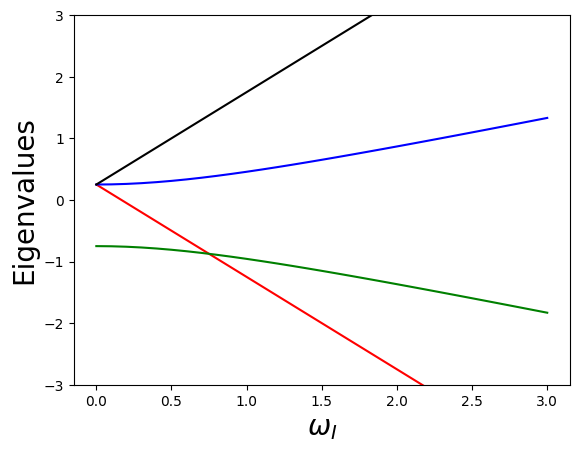

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def paulimatrices():
  sigx = np.array([0.,1,1,0]).reshape(2,2)
  sigy = np.array([0.,-1j,1j,0]).reshape(2,2)
  sigz = np.array([1.,0,0,-1]).reshape(2,2)
  return sigx, sigy, sigz
def mag(xs):
 return np.sqrt(np.sum(xs*xs))
def qrdec(A):
  n = A.shape[0]
  Ap = np.copy(A)
  Q = np.zeros((n,n))
  R = np.zeros((n,n))
  for j in range(n):
    for i in range(j):
      R[i,j] = Q[:,i]@A[:,j]
      Ap[:,j] -= R[i,j]*Q[:,i]
    R[j,j] = mag(Ap[:,j])
    Q[:,j] = Ap[:,j]/R[j,j]
  return Q, R
def qrmet(inA,kmax=100):
  A = np.copy(inA)
  for k in range(1,kmax):
    Q, R = qrdec(A)
    A = R@Q
  qreigvals = np.diag(A)
  return qreigvals
def twospins(omI,omII,gam):
  hbar = 1.
  paulis = paulimatrices()
  iden = np.identity(2)
  SIs = [hbar*np.kron(pa,iden)/2 for pa in paulis]
  SIIs = [hbar*np.kron(iden,pa)/2 for pa in paulis]
  SIdotII=SIs[0]@SIIs[0] + SIs[1]@SIIs[1] + SIs[2]@SIIs[2]
  H = -omI*SIs[2] - omII*SIIs[2] + gam*SIdotII
  H = H.real
  return H
xs = (x * 0.1 for x in range(0, 31))
xs=list(xs)
x1=[]
y1=[]
y2=[]
y3=[]
y4=[]
for x in xs:
  H = twospins(x,2.*x,1.0)
  qreigvals = qrmet(H);
  print(x,qreigvals[0],qreigvals[1],qreigvals[2],qreigvals[3])
  x1.append(float(x))
  y1.append(float(qreigvals[0]))
  y2.append(float(qreigvals[1]))
  y3.append(float(qreigvals[2]))
  y4.append(float(qreigvals[3]))
plt.xlabel('$\omega_I$', fontsize=20)
plt.ylabel('Eigenvalues', fontsize=20)
plt.plot(x1,y1,color='red')
plt.plot(x1,y2,color='green')
plt.plot(x1,y3,color='blue')
plt.plot(x1,y4,color='black')
plt.ylim([-3, 3])